In [ ]:
# To access the Dataset that I have uploaded to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importing required libraries.
import numpy as np 
from skimage import img_as_float
import matplotlib.pyplot as plt
import cv2
import os
#from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Conv2DTranspose,Input,Add,UpSampling2D,Dropout,concatenate
from keras.layers import *
from keras.models import Model
import random
from tensorflow.keras.optimizers import Adam


In [ ]:
#Creating image_list array to hold image's name from dataset 
path='/content/gdrive/MyDrive/Colab Notebooks/PageSegData/' 
image_list=os.listdir(path+"PageImg/")
image_list=[filename.split(".")[0]for filename in image_list]

In [ ]:
#Visualization function to compare 2 images in same plot.
def visualize(img,seg_img, title1, title2):
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(seg_img,cmap='gray')
    plt.title(title2)
    plt.show()

In [ ]:
image_list[0]

'1'

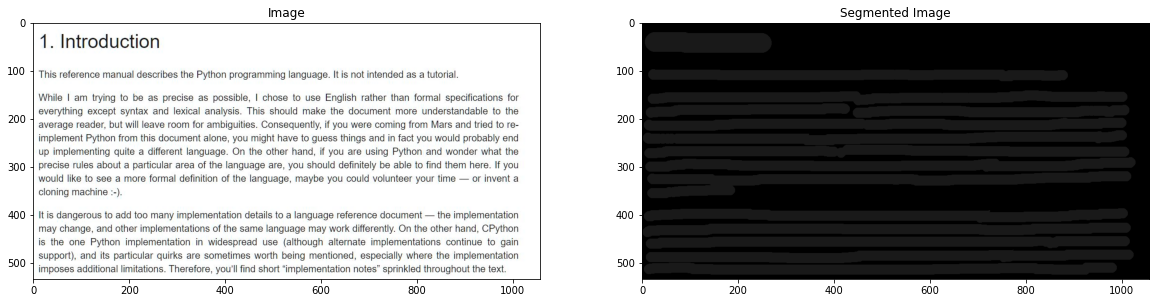

In [ ]:
img=cv2.imread(path+'PageImg/'+image_list[0]+'.JPG',1)
seg=cv2.imread(path+'PageSeg/'+image_list[0]+'_mask.png',1)
visualize(img,seg, 'Image', 'Segmented Image')

In [ ]:
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
    model = Model(inputs,conv10)
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

#model = FCN(n_classes=2,  
            #  input_height=320, 
            #  input_width=320)
model=unet()
model.summary()
    

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2d_20 (Conv2D)             (None, 512, 512, 64  73792       ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 512, 512, 64  36928       ['conv2d_20[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 512, 512, 2)  1154        ['conv2d_21[0][0]']              
                                                                                                  
 conv2d_23 (Conv2D)             (None, 512, 512, 1)  3           ['conv2d_22[0][0]']              
                                                                                                  
Total para

In [ ]:
random.shuffle(image_list)
file_train=image_list[0:int(0.75*len(image_list))]
file_test=image_list[int(0.75*len(image_list)):]

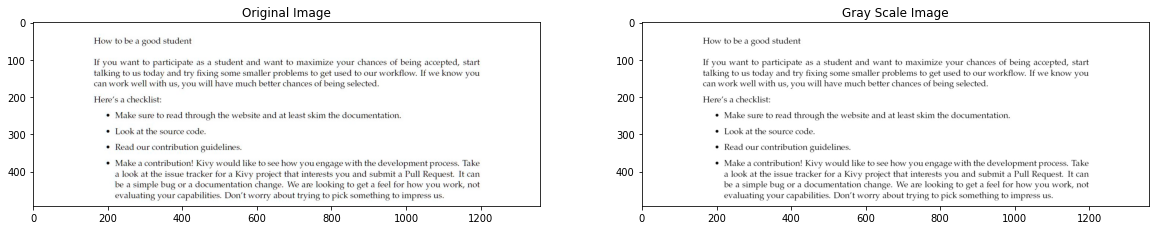

In [ ]:
orgImg=cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/PageSegData/PageImg/100.JPG',1)
grayScaleImg=cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/PageSegData/PageImg/100.JPG',0)
visualize(orgImg, grayScaleImg, 'Original Image', 'Gray Scale Image')

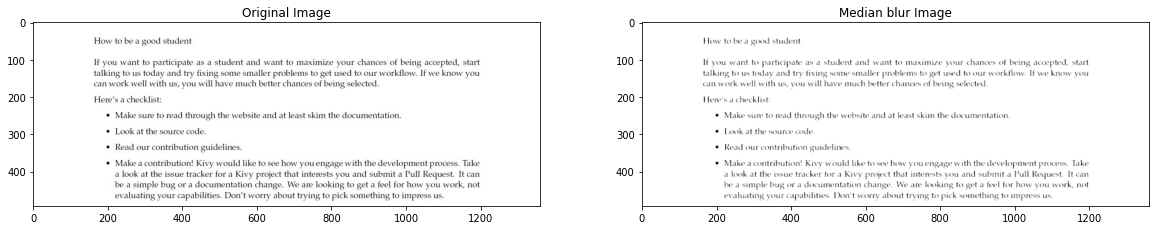

In [ ]:
median_blur=cv2.medianBlur(grayScaleImg,3)
visualize(orgImg, median_blur, 'Original Image', 'Median blur Image')

(array([5.00000e+01, 3.10000e+01, 3.70000e+01, 4.70000e+01, 1.40000e+01,
        4.30000e+01, 4.80000e+01, 3.30000e+01, 5.40000e+01, 8.60000e+01,
        1.33000e+02, 5.20000e+01, 8.60000e+01, 6.00000e+01, 1.26000e+02,
        7.90000e+01, 2.92000e+02, 2.02000e+02, 5.24000e+02, 4.69000e+02,
        7.42000e+02, 5.54000e+02, 4.41000e+02, 5.92000e+02, 3.10000e+02,
        4.16000e+02, 1.92000e+02, 3.01000e+02, 1.92000e+02, 2.92000e+02,
        3.28000e+02, 2.18000e+02, 4.27000e+02, 3.45000e+02, 5.84000e+02,
        4.76000e+02, 8.19000e+02, 6.69000e+02, 9.58000e+02, 5.46000e+02,
        6.51000e+02, 4.53000e+02, 2.72000e+02, 4.35000e+02, 2.78000e+02,
        4.75000e+02, 2.96000e+02, 4.67000e+02, 3.70000e+02, 5.67000e+02,
        9.94000e+02, 8.49000e+02, 1.15900e+03, 6.18000e+02, 7.67000e+02,
        4.10000e+02, 5.63000e+02, 2.65000e+02, 4.15000e+02, 3.03000e+02,
        3.61000e+02, 4.18000e+02, 3.38000e+02, 5.81000e+02, 4.39000e+02,
        8.32000e+02, 5.13000e+02, 7.81000e+02, 5.33

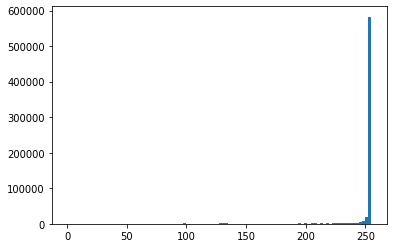

In [ ]:
plt.hist(median_blur.flat,bins=100, range=(0,255))

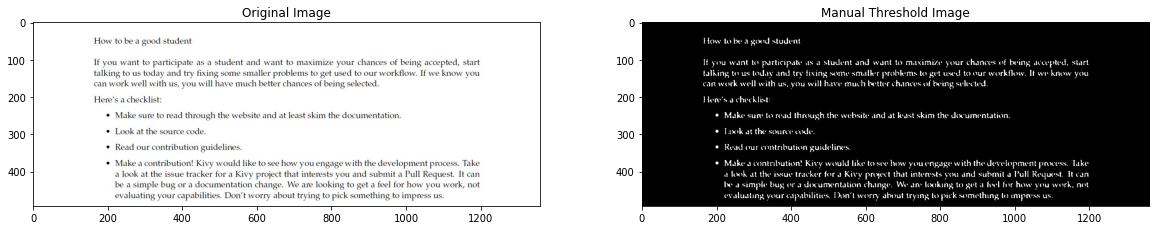

In [ ]:
ret1, thresh1 = cv2.threshold(median_blur, 200,255, cv2.THRESH_BINARY_INV)
visualize(orgImg, thresh1, 'Original Image', 'Manual Threshold Image')

Thresholding value is : 183.0


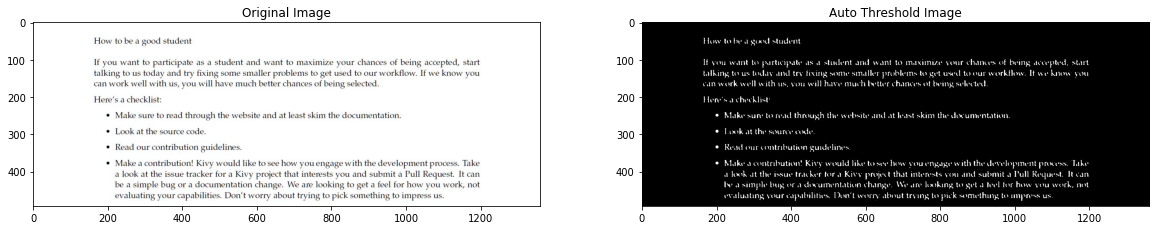

In [ ]:
ret2, thresh2 = cv2.threshold(median_blur, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print("Thresholding value is : "+str(ret2))
visualize(orgImg, thresh2, 'Original Image', 'Auto Threshold Image')

In [ ]:
def get_segmented_img(img,n_classes):
    # Making segmented image with (512,512,1)
    seg_labels=np.zeros((512,512,1))
    #Resizing the segmented/mask image that we are reading to (512,512)
    img=cv2.resize(img,(512,512))
    # Making each pixel of 2 classes
    img=img[:,:,0]
    # It defined the way in which pixel annotation tool annotates images. 
    # It assigns a single pixel to a class in case since there are two classes one background and other text part. 
    # So in this case background is given 0 and text as 24
    cl_list=[0,24]
    seg_labels[:,:,0]=(img!=0).astype(int)
    return seg_labels

def batch_generator(filelist,n_classes,batch_size):
  while True:
    X=[]
    Y=[]
    for i in range(batch_size):
      fn=random.choice(filelist)
      #print(fn)
      #print(path+'PageImg/'+fn+'.JPG')
      img=cv2.imread(path+'PageImg/'+fn+'.JPG',0)
      #print(img.shape)
      ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
      img=cv2.resize(img,(512,512))
      #print(img.shape)
      img=np.expand_dims(img,axis=-1)
      #print(img.shape)
      img=img/255
      #print(img)



      #print(path+'PageImg/'+fn+'_mask.png')
      seg=cv2.imread(path+'PageSeg/'+fn+'_mask.png',1)
      #print(seg.shape)
      seg=get_segmented_img(seg,n_classes)
      X.append(img)
      Y.append(seg)
    yield np.array(X),np.array(Y)

(512, 512)
--------------------
25
--------------------


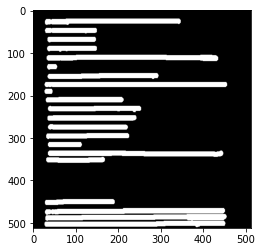

In [ ]:
img,seg=next(batch_generator(file_train,2,1))
plt.imshow(np.squeeze(seg[:,:,:,0],axis=0),cmap='gray')

In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('TextSegmentation.h5', save_weights_only=True, period=1)
model.fit_generator(batch_generator(file_train,2,2),epochs=3,steps_per_epoch=1000,validation_data=batch_generator(file_test,2,2),validation_steps=400,callbacks=[mc],shuffle=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Streaming output truncated to the last 5000 lines.
--------------------
0
--------------------
(512, 512)
--------------------
0
--------------------
 777/1000 [======================>.......] - ETA: 2:17 - loss: 0.4365 - accuracy: 0.9451(512, 512)
--------------------
0
--------------------
(512, 512)
--------------------
25
--------------------
 778/1000 [======================>.......] - ETA: 2:16 - loss: 0.4366 - accuracy: 0.9452(512, 512)
--------------------
0
--------------------
(512, 512)
--------------------
25
--------------------
 779/1000 [======================>.......] - ETA: 2:15 - loss: 0.4365 - accuracy: 0.9451(512, 512)
--------------------
0
--------------------
(512, 512)
--------------------
0
--------------------
 780/1000 [======================>.......] - ETA: 2:15 - loss: 0.4363 - accuracy: 0.9451(512, 512)
--------------------
0
--------------------
(512, 512)
--------------------
0
--------------------
 781/1000 [======================>.......] - ETA: 2:14 -

In [ ]:
import seaborn as sns
img=cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Test3.JPG',0)
#print(img)
ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
img=cv2.resize(img,(512,512))
img= np.expand_dims(img,axis=-1)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


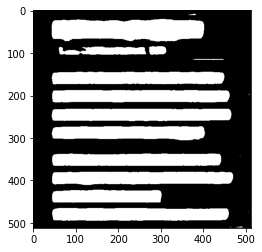

In [ ]:
img=np.expand_dims(img,axis=0)
pred=model.predict(img)
pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)
plt.imshow(pred,cmap='gray')

In [ ]:
plt.imsave('Test3_mask.PNG',pred)